## Goal of this notebook:

The goal is to show how to collect audio features data for tracks from the [official Spotify Web API](https://beta.developer.spotify.com/documentation/web-api/) in order to use it for further analysis/ machine learning which will be part of another notebook.

# 1. Setting Up

The below code is sufficient to set up Spotipy for querying the API endpoint. A more detailed explanation of the whole procedure is available in the [official docs](https://spotipy.readthedocs.io/en/latest/#installation).

In [150]:
from datetime import datetime,timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [151]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# importing my credentials for Spotify API
import creds
cid=creds.cid
secret=creds.secret

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [152]:
playlist_id='0zwcxoitbZ8EYWUGBtShWF'

In [153]:
plst_resp=sp.playlist_items(playlist_id,limit=100, offset=0)

In [154]:
#exploration of response
plst_resp.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [155]:
#exploration of response
print(plst_resp['total'])

plst_resp['items'][0]['track'].keys()

1365


dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [156]:
#adding track info into dataframe

#total amount of tracks in playlist
total=plst_resp['total']


#lists for data from spotify requests about tracks
track_id=[]
track_name=[]
track_artists=[]
track_artists_count=[]
track_artists_ids=[]
track_artists_id2=[]
track_pop=[]
track_dur=[]


for i in range(0,total,100):
    #request to Spotify to bring data for 100 tracks from i-number
    plst_resp=sp.playlist_items(playlist_id,limit=100, offset=i)
    for j in range(len(plst_resp['items'])):
        track_id.append(plst_resp['items'][j]['track']['id'])
        track_name.append(plst_resp['items'][j]['track']['name'])
        track_artists.append(", ".join([x['name'] for x in plst_resp['items'][j]['track']['artists']]))
        track_artists_ids.append(", ".join([x['id'] for x in plst_resp['items'][j]['track']['artists']]))
        track_artists_count.append(len(plst_resp['items'][j]['track']['artists']))
        track_pop.append(plst_resp['items'][j]['track']['popularity'])
        track_dur.append(plst_resp['items'][j]['track']['duration_ms']/60000)

plst=pd.DataFrame({'track_id':track_id,'name':track_name,'artists_names':track_artists,'artists_ids':track_artists_ids,'artists_count':track_artists_count,'popularity':track_pop,'duration':track_dur})

In [157]:
print(plst.shape)
plst.head()

(1365, 7)


,track_id,name,artists_names,artists_ids,artists_count,popularity,duration
0,0oIbkBXuNKpRGrePp7cAeo,Gamma,NTO,7ry8L53T4oJtSIogGYuioq,1,51,6.354233
1,4ThfpcndTEm9P198k5BTEV,In Mexico,"Trashlagoon, Parra for Cuva","2Ceq5nkABzryK0OkaQYtzg, 238y1dKPtMeFEpX3Y6H1Vr",2,34,6.986483
2,18DjkS5pjqCBROtTVH4GK6,We Do What We Want,Alan Fitzpatrick,40JyDxGqtYSowWYT2jaive,1,53,8.426283
3,6kvgeyNduS0YwPKPc6hOmH,In This Dark Time - Two Are Remix,"Aime Simone, Two Are","75oAxYtjhDyLttgvGwQIvM, 3B5IcLPD64jPRgHsSnvHUD",2,45,7.885233
4,0GKDrQqgPf7rRNWtbWg3oy,Красное солнце,"Он Юн, Леха Никонов","5GnduOkKcO3z8phs63Qnaq, 2BdYvHPpYWy5gpgRJdyWwy",2,5,5.066667


In [158]:
plst.reset_index(inplace=True)
plst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1365 non-null   int64  
 1   track_id       1365 non-null   object 
 2   name           1365 non-null   object 
 3   artists_names  1365 non-null   object 
 4   artists_ids    1365 non-null   object 
 5   artists_count  1365 non-null   int64  
 6   popularity     1365 non-null   int64  
 7   duration       1365 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 85.4+ KB


In [159]:
plst.to_csv('plst.csv')

In [160]:
track_af=sp.audio_features(['0oIbkBXuNKpRGrePp7cAeo','4ThfpcndTEm9P198k5BTEV'])
print(track_af)

[{'danceability': 0.664, 'energy': 0.72, 'key': 1, 'loudness': -9.668, 'mode': 1, 'speechiness': 0.0485, 'acousticness': 0.000697, 'instrumentalness': 0.798, 'liveness': 0.126, 'valence': 0.0323, 'tempo': 125.009, 'type': 'audio_features', 'id': '0oIbkBXuNKpRGrePp7cAeo', 'uri': 'spotify:track:0oIbkBXuNKpRGrePp7cAeo', 'track_href': 'https://api.spotify.com/v1/tracks/0oIbkBXuNKpRGrePp7cAeo', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0oIbkBXuNKpRGrePp7cAeo', 'duration_ms': 381254, 'time_signature': 4}, {'danceability': 0.666, 'energy': 0.622, 'key': 8, 'loudness': -9.989, 'mode': 0, 'speechiness': 0.0336, 'acousticness': 0.736, 'instrumentalness': 0.873, 'liveness': 0.115, 'valence': 0.13, 'tempo': 117.998, 'type': 'audio_features', 'id': '4ThfpcndTEm9P198k5BTEV', 'uri': 'spotify:track:4ThfpcndTEm9P198k5BTEV', 'track_href': 'https://api.spotify.com/v1/tracks/4ThfpcndTEm9P198k5BTEV', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4ThfpcndTEm9P198k5BTEV', 'durat

In [161]:
#importing tracks features to dataframe

# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()


tracks_features=[]

# for i in range(0,total,100):
for i in range(0,total,100):
    tracks_features.extend(sp.audio_features(plst['track_id'][i:i+100].values))
    
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)    

Time to run this code (in seconds): 2.5170437000001584


In [162]:
df_features=pd.DataFrame(tracks_features)
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.664,0.720,1,-9.668,1,0.0485,0.000697,0.798,0.126,0.0323,125.009,audio_features,0oIbkBXuNKpRGrePp7cAeo,spotify:track:0oIbkBXuNKpRGrePp7cAeo,https://api.spotify.com/v1/tracks/0oIbkBXuNKpR...,https://api.spotify.com/v1/audio-analysis/0oIb...,381254,4
1,0.666,0.622,8,-9.989,0,0.0336,0.736000,0.873,0.115,0.1300,117.998,audio_features,4ThfpcndTEm9P198k5BTEV,spotify:track:4ThfpcndTEm9P198k5BTEV,https://api.spotify.com/v1/tracks/4ThfpcndTEm9...,https://api.spotify.com/v1/audio-analysis/4Thf...,419190,4
2,0.770,0.966,6,-6.703,1,0.0422,0.000438,0.932,0.098,0.3490,126.010,audio_features,18DjkS5pjqCBROtTVH4GK6,spotify:track:18DjkS5pjqCBROtTVH4GK6,https://api.spotify.com/v1/tracks/18DjkS5pjqCB...,https://api.spotify.com/v1/audio-analysis/18Dj...,505577,4
3,0.696,0.817,11,-7.488,0,0.0388,0.007790,0.656,0.107,0.2710,122.004,audio_features,6kvgeyNduS0YwPKPc6hOmH,spotify:track:6kvgeyNduS0YwPKPc6hOmH,https://api.spotify.com/v1/tracks/6kvgeyNduS0Y...,https://api.spotify.com/v1/audio-analysis/6kvg...,473115,4
4,0.513,0.904,11,-3.483,0,0.4430,0.043600,0.000,0.295,0.2880,75.293,audio_features,0GKDrQqgPf7rRNWtbWg3oy,spotify:track:0GKDrQqgPf7rRNWtbWg3oy,https://api.spotify.com/v1/tracks/0GKDrQqgPf7r...,https://api.spotify.com/v1/audio-analysis/0GKD...,304000,4


In [163]:
plst_features=plst.merge(df_features,left_on='track_id',right_on='id',how='left')
print(plst_features.shape)
plst_features.head()

(1385, 26)


,index,track_id,name,artists_names,artists_ids,artists_count,popularity,duration,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0oIbkBXuNKpRGrePp7cAeo,Gamma,NTO,7ry8L53T4oJtSIogGYuioq,1,51,6.354233,0.664,0.720,...,0.126,0.0323,125.009,audio_features,0oIbkBXuNKpRGrePp7cAeo,spotify:track:0oIbkBXuNKpRGrePp7cAeo,https://api.spotify.com/v1/tracks/0oIbkBXuNKpR...,https://api.spotify.com/v1/audio-analysis/0oIb...,381254,4
1,1,4ThfpcndTEm9P198k5BTEV,In Mexico,"Trashlagoon, Parra for Cuva","2Ceq5nkABzryK0OkaQYtzg, 238y1dKPtMeFEpX3Y6H1Vr",2,34,6.986483,0.666,0.622,...,0.115,0.1300,117.998,audio_features,4ThfpcndTEm9P198k5BTEV,spotify:track:4ThfpcndTEm9P198k5BTEV,https://api.spotify.com/v1/tracks/4ThfpcndTEm9...,https://api.spotify.com/v1/audio-analysis/4Thf...,419190,4
2,2,18DjkS5pjqCBROtTVH4GK6,We Do What We Want,Alan Fitzpatrick,40JyDxGqtYSowWYT2jaive,1,53,8.426283,0.770,0.966,...,0.098,0.3490,126.010,audio_features,18DjkS5pjqCBROtTVH4GK6,spotify:track:18DjkS5pjqCBROtTVH4GK6,https://api.spotify.com/v1/tracks/18DjkS5pjqCB...,https://api.spotify.com/v1/audio-analysis/18Dj...,505577,4
3,3,6kvgeyNduS0YwPKPc6hOmH,In This Dark Time - Two Are Remix,"Aime Simone, Two Are","75oAxYtjhDyLttgvGwQIvM, 3B5IcLPD64jPRgHsSnvHUD",2,45,7.885233,0.696,0.817,...,0.107,0.2710,122.004,audio_features,6kvgeyNduS0YwPKPc6hOmH,spotify:track:6kvgeyNduS0YwPKPc6hOmH,https://api.spotify.com/v1/tracks/6kvgeyNduS0Y...,https://api.spotify.com/v1/audio-analysis/6kvg...,473115,4
4,4,0GKDrQqgPf7rRNWtbWg3oy,Красное солнце,"Он Юн, Леха Никонов","5GnduOkKcO3z8phs63Qnaq, 2BdYvHPpYWy5gpgRJdyWwy",2,5,5.066667,0.513,0.904,...,0.295,0.2880,75.293,audio_features,0GKDrQqgPf7rRNWtbWg3oy,spotify:track:0GKDrQqgPf7rRNWtbWg3oy,https://api.spotify.com/v1/tracks/0GKDrQqgPf7r...,https://api.spotify.com/v1/audio-analysis/0GKD...,304000,4


In [164]:
# plst_features.to_csv('data/plst_features.csv')

plst_features.to_csv('data/plst_features.csv')

In [165]:
plst_features['artists_ids'].head()

0                            7ry8L53T4oJtSIogGYuioq
1    2Ceq5nkABzryK0OkaQYtzg, 238y1dKPtMeFEpX3Y6H1Vr
2                            40JyDxGqtYSowWYT2jaive
3    75oAxYtjhDyLttgvGwQIvM, 3B5IcLPD64jPRgHsSnvHUD
4    5GnduOkKcO3z8phs63Qnaq, 2BdYvHPpYWy5gpgRJdyWwy
Name: artists_ids, dtype: object

In [166]:
# plst_features['artists_ids'].str.split(', ').head()
# plst_features['tmp']=plst_features['artists_ids'].str.split(', ')[0]

# nn=0
# plst_features['artists_id1']=''
# plst_features['artists_id2']=''

artists_lst=[]

for artists in plst_features['artists_ids']:

    artists_lst.extend(artists.split(', '))

In [167]:
artists_df=pd.DataFrame(artists_lst,columns=['artist'])
print(artists_df.count())
artists_df=pd.DataFrame(artists_df['artist'].unique(),columns=['artist'])
print(artists_df.count())

artist    1948
dtype: int64
artist    1353
dtype: int64


In [168]:
print(sp.artist('5eKLa1xyHLq8ERWmT1CRHj').keys())
aa=sp.artists(['5eKLa1xyHLq8ERWmT1CRHj','2Ceq5nkABzryK0OkaQYtzg'])

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])


In [169]:
', '.join(sp.artist('5eKLa1xyHLq8ERWmT1CRHj')['genres'])

'big beat, breakbeat, electronica'

In [170]:
artists_df['name']=None
artists_df['pop']=None
artists_df['genres']=None
artists_df['followers']=None

# artists_df['name'].astype('object')
# artists_df['pop'].astype('float64')
# artists_df['genres'].astype('object')
# artists_df['followers'].astype('int64')

artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist     1353 non-null   object
 1   name       0 non-null      object
 2   pop        0 non-null      object
 3   genres     0 non-null      object
 4   followers  0 non-null      object
dtypes: object(5)
memory usage: 53.0+ KB


In [171]:
n_artists=len(artists_df['artist'])

batch=50

for i in range(0,n_artists,batch):
#     print (i,i+batch)
    
    artists_sp=sp.artists(artists_df['artist'][i:i+batch])

    for j in range(len(artists_sp['artists'])):
#         print (i+j)

        id=artists_sp['artists'][j]['id']
        
        artists_df['name'][artists_df['artist']==id]=artists_sp['artists'][j]['name']
        artists_df['genres'][artists_df['artist']==id]=",".join(artists_sp['artists'][j]['genres'])
        artists_df['pop'][artists_df['artist']==id]=artists_sp['artists'][j]['popularity']
        artists_df['followers'][artists_df['artist']==id]=artists_sp['artists'][j]['followers']['total']
        


In [172]:
# temp
# artists_df['name'][artists_df.loc[:,'artist']=='7ry8L53T4oJtSIogGYuioq']='abc'

artists_df.head()

,artist,name,pop,genres,followers
0,7ry8L53T4oJtSIogGYuioq,NTO,57,"electronica,minimal melodic techno,minimal tec...",200755
1,2Ceq5nkABzryK0OkaQYtzg,Trashlagoon,31,,4590
2,238y1dKPtMeFEpX3Y6H1Vr,Parra for Cuva,57,"downtempo,electronica,new french touch,tropica...",147419
3,40JyDxGqtYSowWYT2jaive,Alan Fitzpatrick,48,"house,minimal techno,tech house,techno",129767
4,75oAxYtjhDyLttgvGwQIvM,Aime Simone,44,,7743


In [173]:
artists_df.replace({'':None},inplace=True)

In [174]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist     1353 non-null   object
 1   name       1353 non-null   object
 2   pop        1353 non-null   int64 
 3   genres     966 non-null    object
 4   followers  1353 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 53.0+ KB


In [175]:
artists_df.sort_values(by='pop',ascending=False)

,artist,name,pop,genres,followers
1146,3TVXtAsR1Inumwj472S9r4,Drake,95,"canadian hip hop,canadian pop,hip hop,rap,toro...",66234871
670,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,93,"canadian contemporary r&b,canadian pop,pop",48624921
98,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,90,"chicago rap,rap",17998945
199,7dGJo4pcD2V6oG8kP0tJRR,Eminem,89,"detroit hip hop,hip hop,rap",58367199
782,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,88,"art pop,electropop,pop",67708219
...,...,...,...,...,...
1290,3C6wnYcGabhhfhh6YjjNO1,Tony Krunk,0,None,5
1041,3EbFb38KLnAhAsT8P2Dgmq,Olga Ivusheikova,0,None,5
1042,2Ni0QMWbumpyGNjFkr0Fjm,Arkady Starkov,0,None,0
544,4zjcC8ljp8uV3hjoEuzZK8,3'0'3 Project,0,None,67


In [176]:
artists_df.to_csv('data/artists_df.csv')

In [177]:
track_genres_list=[]

for track in plst_features.iterrows():
    genres_list=[]
#     print(track[1])
    #collecting all gengres of track
    for artist_id in track[1]['artists_ids'].split(', '):
#         print(type(artists_df['genres'][artists_df['artist']==artist_id]))
        for genre in artists_df['genres'][artists_df['artist']==artist_id]:
            if (genre!=None): 
#                 print(genre.split(','))
                genres_list.extend(genre.split(','))  
#     print(len(set(genres_list)))
    for genre in set(genres_list):
        track_genres_list.append({'track_id':track[1]['track_id'],'name':track[1]['name']+' - '+track[1]['artists_names'],'n_genres':len(set(genres_list)),'genre':genre})

In [178]:
track_genres_list[:3]

[{'track_id': '0oIbkBXuNKpRGrePp7cAeo',
  'name': 'Gamma - NTO',
  'n_genres': 5,
  'genre': 'tropical house'},
 {'track_id': '0oIbkBXuNKpRGrePp7cAeo',
  'name': 'Gamma - NTO',
  'n_genres': 5,
  'genre': 'minimal melodic techno'},
 {'track_id': '0oIbkBXuNKpRGrePp7cAeo',
  'name': 'Gamma - NTO',
  'n_genres': 5,
  'genre': 'minimal techno'}]

In [179]:
track_genres_df=pd.DataFrame(track_genres_list)
track_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   track_id  4350 non-null   object
 1   name      4350 non-null   object
 2   n_genres  4350 non-null   int64 
 3   genre     4350 non-null   object
dtypes: int64(1), object(3)
memory usage: 136.1+ KB


In [180]:
track_genres_df.to_csv('data/track_genres_df.csv')

In [181]:
print(len(track_genres_df['genre'].unique()))
track_genres_df['genre'].unique()

788


array(['tropical house', 'minimal melodic techno', 'minimal techno',
       'electronica', 'new french touch', 'downtempo', 'techno',
       'tech house', 'house', 'ukrainian electronic',
       'russian underground rap', 'russian hip hop', 'footwork',
       'electra', 'russian techno', 'russian electronic', 'ghettotech',
       'pop dance', 'trance', 'edm', 'progressive house',
       'progressive trance', 'drum and bass', 'jungle', 'breakbeat',
       'swiss house', 'melodic techno', 'deep disco house', 'ninja',
       'uk hip hop', 'turntablism', 'big beat', 'trip hop',
       'belarusian rock', 'russian alt pop', 'bass house', 'soundtrack',
       'orchestral soundtrack', 'french soundtrack', 'german dnb',
       'neurofunk', 'uk bass', 'future garage', 'organic house',
       'organic electronic', 'microhouse', 'german techno',
       'frankfurt electronic', 'russian experimental electronic',
       'nu disco', 'filter house', 'japanese chillhop', 'future rock',
       'danish ro

In [182]:
# #experiments

# track_genres_df=pd.read_csv('data/track_genres_df.csv')
# track_genres_df.rename(columns={'Unnamed: 0':'track_index'},inplace=True)
# track_genres_df.info()

In [183]:
# looking for names of some genres

genres_symbs='rock'

track_genres_df['genre'][track_genres_df['genre'].str.contains(genres_symbs)].unique()


array(['belarusian rock', 'future rock', 'danish rock', 'electronic rock',
       'russian punk rock', 'russian post-rock', 'dance rock',
       'post-rock', 'russian rock', 'russian folk rock', 'hard rock',
       'blues rock', 'glam rock', 'album rock', 'ukrainian rock',
       'rap rock', 'indie rock', 'rock-and-roll', 'pop rock',
       'classic russian rock', 'modern rock', 'rock',
       'russian alternative rock', 'modern alternative rock',
       'boston rock', 'alternative rock', 'romanian rock',
       'modern blues rock', 'norwegian rock', 'acoustic rock',
       'canadian rock', 'ukrainian folk rock', 'reggae rock', 'funk rock',
       'psychedelic rock', 'classic rock', 'country rock', 'roots rock',
       'folk rock', 'instrumental post-rock', 'american post-rock',
       'industrial rock', 'piano rock', 'power blues-rock', 'lovers rock',
       'progressive rock', 'art rock', 'symphonic rock', 'welsh rock',
       'australian rock', 'australian alternative rock',
       

In [184]:
# str.contain(track_genres_df['genre'].unique())

# for genre in track_genres_df['genre'].unique():
#     if (np.char.count(genre, 'techno')): print(genre)

genre_replace_map={'.*alt$':'alternative','.*drum and bass':'dnb','.*neurofunk':'dnb','.*hip hop':'rap',
                   '.*breakbeat':'breaks','.*trip hop':'triphop','alternative dance':'altern_dance'}

track_genres_replaced_df = track_genres_df.copy()

track_genres_replaced_df['genre'].replace(regex=genre_replace_map,inplace=True)
# 
track_genres_replaced_df.duplicated(subset=['track_id','genre']).sum()

track_genres_replaced_df.drop_duplicates(subset=['track_id','genre'],inplace=True)

In [185]:
# genre_vect_df.sum(axis=0).describe()

track_genres_replaced_df.shape

(4065, 4)

In [186]:
genres_list=['alternative','altern_dance','bass', 'deep','disco','dnb','downtempo','dubstep','dance','edm','electro','folk',
             'funk','hardcore','rap','house','indie','jazz','melodic','metal','organic','pop',
             'punk','rave','rock','soul','techno','trance','triphop', 'witch']

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(vocabulary=genres_list)
genre_vect = vectorizer.fit_transform(track_genres_replaced_df['genre'])
genre_vect.toarray().shape

genre_vect_df=pd.DataFrame(genre_vect.toarray(),columns=vectorizer.get_feature_names())
genre_vect_df.head()

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,organic,pop,punk,rave,rock,soul,techno,trance,triphop,witch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.528894,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [187]:
print(track_genres_replaced_df.shape)
genre_vect_df.shape

(4065, 4)


(4065, 30)

In [188]:
genre_vect_df=genre_vect_df.merge(track_genres_replaced_df['track_id'],how='left',left_index=True,right_index=True)
genre_vect_df

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,pop,punk,rave,rock,soul,techno,trance,triphop,witch,track_id
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.528894,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1nrni11feutiL6PNF9IWyk
4061,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1nrni11feutiL6PNF9IWyk
4062,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1nrni11feutiL6PNF9IWyk
4063,0.0,0.0,0.0,0.606323,0.0,0.0,0.0,0.795218,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1nrni11feutiL6PNF9IWyk


In [189]:
genre_vect_df=genre_vect_df.groupby('track_id').sum()
genre_vect_df.head()

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,organic,pop,punk,rave,rock,soul,techno,trance,triphop,witch
track_id,,,,,,,,,,,,,,,,,,,,,
00Ib3wOPcbqZsb9rh1AILF,0.0,0.0,0.0,0.843232,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00IqXuw3kRMbLrdjUwjZRF,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.597494,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
016COOQeIx1AVtOLLZnaP0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
018SQDupRTRsl1Wolu1X0c,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
019koTXzsvil0dhwzEQzSX,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [190]:
for i in genre_vect_df.columns:
    genre_vect_df[i]=genre_vect_df[i].apply(lambda x: 1 if (x>0) else 0)

genre_vect_df.head()

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,organic,pop,punk,rave,rock,soul,techno,trance,triphop,witch
track_id,,,,,,,,,,,,,,,,,,,,,
00Ib3wOPcbqZsb9rh1AILF,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00IqXuw3kRMbLrdjUwjZRF,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
016COOQeIx1AVtOLLZnaP0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
018SQDupRTRsl1Wolu1X0c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
019koTXzsvil0dhwzEQzSX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [191]:
genre_vect_df=genre_vect_df.merge(plst[['index','track_id']],how='left',left_index=True,right_on='track_id').sort_values(by='index',ascending=False)


In [213]:
n_periods=15

data_for_visual=genre_vect_df.drop(columns=['index','track_id'],axis=1).cumsum(axis=0).iloc[0:int(len(genre_vect_df)):int(len(genre_vect_df)/n_periods),:]

In [193]:
top_n_genres_for_vis=20

drop_genres=data_for_visual.sum().sort_values()[:len(data_for_visual.sum())-top_n_genres_for_vis].index
data_for_visual=data_for_visual.drop(columns=list(drop_genres))

data_for_visual.reset_index(drop=True,inplace=True)
data_for_visual

,alternative,altern_dance,bass,deep,dnb,dance,edm,electro,funk,rap,house,indie,metal,pop,punk,rave,rock,soul,techno,triphop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,7,2,3,7,10,4,5,4,9,26,18,3,6,17,3,3,16,4,8,4
2,12,4,6,15,21,10,16,15,15,39,40,15,12,35,7,5,36,7,14,4
3,16,6,8,18,28,19,22,21,19,56,51,21,14,54,12,9,57,8,19,8
4,21,11,10,27,32,29,33,28,21,66,75,32,21,80,12,12,76,8,28,10
5,26,14,16,37,38,35,39,34,24,84,98,36,27,94,18,14,89,10,37,11
6,29,15,16,41,40,38,43,37,28,93,126,41,29,112,26,14,109,15,51,12
7,32,17,22,45,42,44,50,42,31,102,140,50,31,139,28,17,116,19,63,13
8,36,19,22,47,52,52,57,45,36,119,164,53,34,159,30,17,125,20,81,17
9,41,19,24,53,59,53,62,47,41,135,188,57,34,175,33,17,134,24,95,19


In [194]:
data_for_visual_transposed=data_for_visual.transpose().sort_values(by=len(data_for_visual)-1,ascending=False)

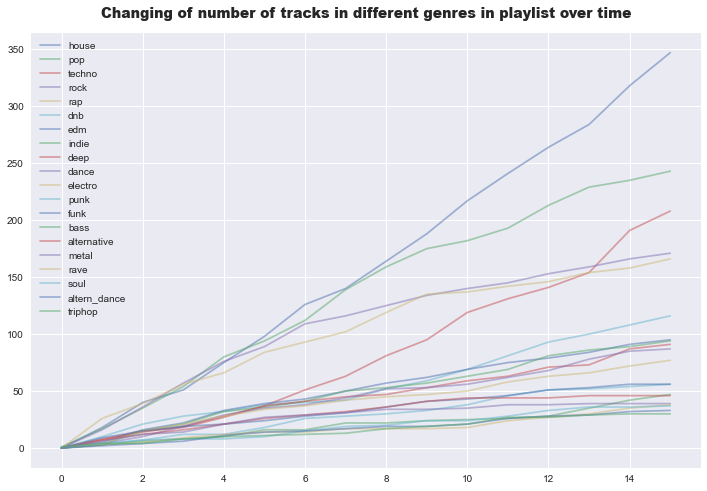

<Figure size 1008x432 with 0 Axes>

In [273]:
fig,ax=plt.subplots(figsize=(12, 8))

plt.figure(figsize=(14, 6))
plt.style.use("seaborn")

for genre in data_for_visual_transposed.iterrows():
    ax.plot(range(len(data_for_visual)),genre[1],label=genre[0],alpha=0.5)
ax.legend(loc='upper left')
ax.set_title('Changing of number of tracks in different genres in playlist over time',fontdict={'fontsize':14,'fontweight':800},pad=15)
plt.show()

In [246]:
#count quantity of tracks of all genres not in top_n_genres_for_vis list
others=data_for_visual_all_g_copy.iloc[-1].sort_values().iloc[:-top_n_genres_for_vis].sum()
others

# np.append(data_for_visual_transposed[15].values,others)
# np.append(data_for_visual_transposed.index.values,'others')

array(['house', 'pop', 'techno', 'rock', 'rap', 'dnb', 'edm', 'indie',
       'deep', 'dance', 'electro', 'punk', 'funk', 'bass', 'alternative',
       'metal', 'rave', 'soul', 'altern_dance', 'triphop', 'others'],
      dtype=object)

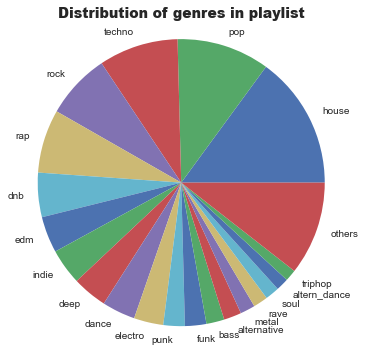

In [267]:
fig, ax = plt.subplots()
ax.pie(np.append(data_for_visual_transposed[15].values,others), labels=np.append(data_for_visual_transposed.index.values,'others'), radius=1.2)
ax.set_title('Distribution of genres in playlist',fontdict={'fontsize':14,'fontweight':800},pad=15)
plt.show()

<h3>Dynamic off interest for current genre</h3>

In [198]:
#enter the genre

genre='Pop punk'

n_periods=13

all_words_only=True

In [199]:
genre_split=str.lower(genre).split(' ')

In [200]:
genres=track_genres_df['genre']

all_genres=[]
if (all_words_only):
    for each in genre_split:
        genres=genres[genres.str.contains(each)]
    print(len(genres.unique()))
    print(genres.unique())
else: 
    for each in genre_split:
        all_genres.extend(genres[genres.str.contains(each)].unique())
    print(len(all_genres))
    print(all_genres)


3
['russian pop punk' 'pop punk' 'socal pop punk']


In [201]:
vectorizer2=TfidfVectorizer(vocabulary=genre_split)
genre_vect2 = vectorizer2.fit_transform(track_genres_replaced_df['genre'])
genre_vect2.toarray().shape

genre_vect_df2=pd.DataFrame(genre_vect2.toarray(),columns=vectorizer2.get_feature_names())

In [202]:
for i in genre_vect_df2.columns:
    genre_vect_df2[i]=genre_vect_df2[i].apply(lambda x: 1 if (x>0) else 0)

# genre_vect_df2.drop(columns='type',inplace=True)
genre_vect_df2.sum()

pop     360
punk     88
dtype: int64

In [203]:
(genre_vect_df2.sum(axis=1)>0).sum()

433

In [204]:
if (all_words_only):
    genre_vect_df2['type']=genre_vect_df2.sum(axis=1)==len(genre_vect_df2.columns)
else:                                
    genre_vect_df2['type']=genre_vect_df2.sum(axis=1)>0

In [205]:
genre_vect_df2_merged=genre_vect_df2.merge(track_genres_df['track_id'],how='left',left_index=True,right_index=True).reset_index()
genre_vect_df2_merged=genre_vect_df2_merged.groupby('track_id').sum().sort_values(by='index')
genre_vect_df2_merged

,index,pop,punk,type
track_id,,,,
0oIbkBXuNKpRGrePp7cAeo,10,0,0,0
6kvgeyNduS0YwPKPc6hOmH,13,0,0,0
0GKDrQqgPf7rRNWtbWg3oy,14,0,0,0
6dYXU1aDwRLs9K3bG8BhA1,17,0,0,0
4ThfpcndTEm9P198k5BTEV,26,0,0,0
...,...,...,...,...
6Xi897JXNLSoIaoYZwgTLc,52364,0,0,0
663GG77Wq2Z6TJW0YgqZAt,52381,5,0,0
3LpIXpas8lnDrUDqOYyB7u,58296,7,0,0


In [206]:
genre_vect_df2_merged['type'][genre_vect_df2_merged['type']>0]=1

data_for_visual2=genre_vect_df2_merged['type'].cumsum(axis=0)
data_for_visual2=data_for_visual2[0:int(len(data_for_visual2)):int(len(data_for_visual2)/(n_periods-1))]
data_for_visual2

track_id
0oIbkBXuNKpRGrePp7cAeo     0
1vDjAGm9gVV6R7dRWkWv0P     0
6y86tCvX3EGqZL3SMWMtiH     0
3CCd4WV9WDcxycVIDd9B5a     0
407RsRqXuajlQNQg8Y0dHn     2
7H5Z1do4yZfAO9AL8TAx9j     3
2yqtv5ppqZwmykWLnO8U3z     3
2GFKIOHwpJXVk14xo4NTUE     5
6acBIiTtlfNblQvEcZLLE1     7
1Y9rILheb8qOB4odmXu52j     8
75mzvCmnxclJax5EQrjdk9    10
08Uz2WDG2HpZwCX7qOn7OJ    11
0ckl0fq3Za3xYOmLrjaPZk    12
Name: type, dtype: int64

In [207]:
data_for_visual2_transposed=data_for_visual2.reset_index(drop=True).transpose().sort_values(ascending=True)
data_for_visual2_transposed

0      0
1      0
2      0
3      0
4      2
5      3
6      3
7      5
8      7
9      8
10    10
11    11
12    12
Name: type, dtype: int64

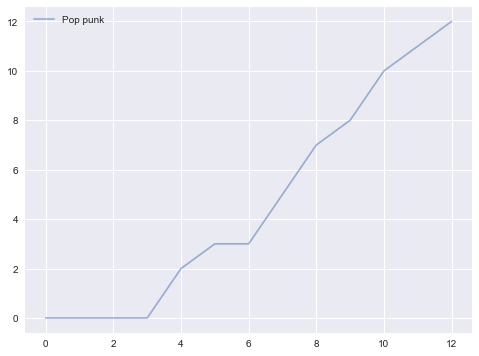

<Figure size 1008x432 with 0 Axes>

In [208]:
fig,ax=plt.subplots(figsize=(8, 6))

plt.figure(figsize=(14, 6))
plt.style.use("seaborn")

ax.plot(range(n_periods),data_for_visual2_transposed,label=genre,alpha=0.5)

ax.legend(loc='upper left')
plt.show()

<h3>Visualization and EDA</h3>

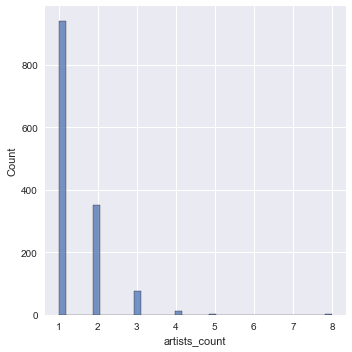

In [209]:
g = sns.displot(plst_features['artists_count'],kind='hist')
plt.show()

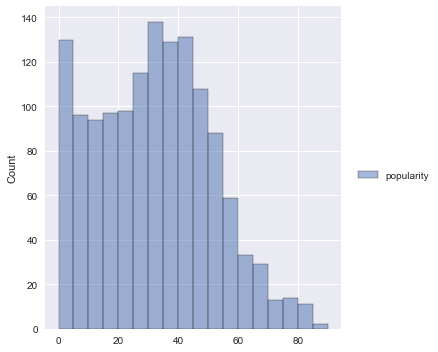

In [210]:
g = sns.displot([plst_features['popularity']])
plt.show()

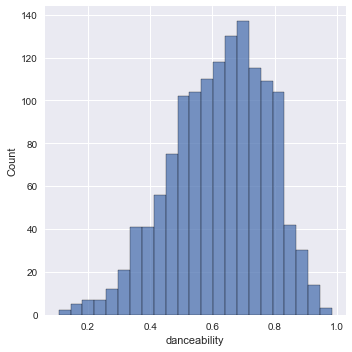

In [211]:
g = sns.displot(plst_features['danceability'])
plt.show()

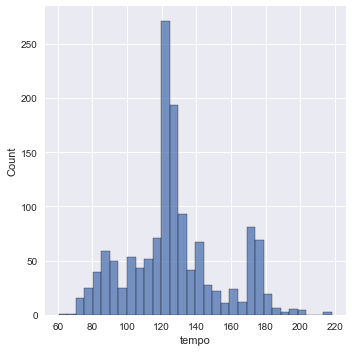

In [212]:
g = sns.displot(plst_features['tempo'])
plt.show()